In [1]:
import pandas as pd

# ISOLATING DIRECTORS

In [2]:
imdb_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
imdb_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [3]:
imdb_directors_only = imdb_crew.copy(deep=True)
# tn_movie_profit.drop(['release_date','id'], axis=1, inplace=True)]

In [4]:
imdb_directors_only.drop(['writers'], axis=1, inplace=True)
imdb_directors_only

,tconst,directors
0,tt0285252,nm0899854
1,tt0438973,NaN
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,"nm0089502,nm2291498,nm2292011"
...,...,...
146139,tt8999974,nm10122357
146140,tt9001390,nm6711477
146141,tt9001494,"nm10123242,nm10123248"
146142,tt9004986,nm4993825


In [5]:
imdb_directors_only.directors = imdb_directors_only.directors.str.split(',')
imdb_directors_only.dropna(subset=['directors'], inplace=True)
imdb_directors_only=imdb_directors_only.explode('directors')
imdb_directors_only

,tconst,directors
0,tt0285252,nm0899854
2,tt0462036,nm1940585
3,tt0835418,nm0151540
4,tt0878654,nm0089502
4,tt0878654,nm2291498
...,...,...
146139,tt8999974,nm10122357
146140,tt9001390,nm6711477
146141,tt9001494,nm10123242
146141,tt9001494,nm10123248


# ISOLATING RATINGS

In [6]:
imdb_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
imdb_ratings_only = imdb_ratings.copy(deep=True)
imdb_ratings_only.drop(['numvotes'], axis=1, inplace=True)
imdb_ratings_only

,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5
...,...,...
73851,tt9805820,8.1
73852,tt9844256,7.5
73853,tt9851050,4.7
73854,tt9886934,7.0


# MERGING DIRECTORS AND RATINGS #

In [7]:
df_directors = pd.merge(imdb_directors_only, imdb_ratings_only, on='tconst')
df_directors

,tconst,directors,averagerating
0,tt0285252,nm0899854,3.9
1,tt0462036,nm1940585,5.5
2,tt0835418,nm0151540,5.0
3,tt0878654,nm0089502,5.8
4,tt0878654,nm2291498,5.8
...,...,...,...
86026,tt8948614,nm0827830,7.4
86027,tt8948614,nm0839064,7.4
86028,tt8954732,nm0737517,6.0
86029,tt8991416,nm7731173,6.7


In [8]:
df_directors['directors'].astype(str)

0        nm0899854
1        nm1940585
2        nm0151540
3        nm0089502
4        nm2291498
           ...    
86026    nm0827830
86027    nm0839064
86028    nm0737517
86029    nm7731173
86030    nm4993825
Name: directors, Length: 86031, dtype: object

# ISOLATING NAMES #

In [9]:
imdb_names = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
imdb_names

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [10]:
names = imdb_names.copy(deep=True)
names.drop(['birth_year', 'death_year', 'primary_profession'], axis=1, inplace=True)
names = names.dropna()

# MERGING NAMES AND DIRECTORS

In [11]:
df_directors = df_directors.rename(columns={'directors':'nconst'})
#imdb_director_ratings = imdb_director_ratings.rename(columns={'directors':'nconst'})

In [12]:
directors = pd.merge(df_directors, names, on='nconst')

In [13]:
directors

,tconst,nconst,averagerating,primary_name,known_for_titles
0,tt0285252,nm0899854,3.9,Tony Vitale,"tt0285252,tt0106489,tt0119465,tt0359774"
1,tt0462036,nm1940585,5.5,Bill Haley,"tt0462036,tt6740510"
2,tt0835418,nm0151540,5.0,Jay Chandrasekhar,"tt0144557,tt0486551,tt0331953,tt0247745"
3,tt0859635,nm0151540,6.1,Jay Chandrasekhar,"tt0144557,tt0486551,tt0331953,tt0247745"
4,tt0878654,nm0089502,5.8,Albert Pyun,"tt0084749,tt0097138,tt0091818,tt7008310"
...,...,...,...,...,...
85286,tt8892138,nm10071340,9.2,Tyler Sansom,tt8892138
85287,tt8931532,nm0855646,6.9,Egidio Termine,"tt0093104,tt0100273,tt8931532,tt0232297"
85288,tt8947660,nm10097606,8.1,Srikanta Galui,tt8947660
85289,tt8954732,nm0737517,6.0,Mike Rohl,"tt0460681,tt4145054,tt8954732,tt4698792"


In [78]:
directors=directors.sort_values(by=['averagerating'], ascending=False)

In [79]:
directors

,tconst,nconst,averagerating,primary_name,known_for_titles
75787,tt9715646,nm3388005,10.0,Stephen Peek,"tt6400614,tt5541338,tt7207006,tt7825894"
5140,tt5344358,nm6925060,10.0,Tristan David Luciotti,"tt9378510,tt8342206,tt8353934,tt6170078"
68316,tt4944240,nm6893562,10.0,Chad Carpenter,"tt4176738,tt4944240"
8002,tt6295832,nm3704168,10.0,Michiel Brongers,"tt2203394,tt6295832,tt1549132,tt1820401"
41736,tt5390098,nm4637768,10.0,Masahiro Hayakawa,"tt2006797,tt5390098"
...,...,...,...,...,...
47849,tt1872215,nm3087956,1.0,Chihiro Ikeda,"tt4280842,tt5425998,tt1268912,tt2116976"
63950,tt2404411,nm4432438,1.0,Yohan Riba Martinez,"tt7144062,tt2326007,tt1909756,tt1931604"
84209,tt4280842,nm6979451,1.0,Wataru Kudô,tt4280842
47851,tt9378134,nm3087956,1.0,Chihiro Ikeda,"tt4280842,tt5425998,tt1268912,tt2116976"


In [14]:
directors.to_csv('data/directors_ratings.csv', index=False)

In [18]:
directors=directors.sort_values(by=['averagerating'], ascending=False).head(100)
directors

,tconst,nconst,averagerating,primary_name,known_for_titles
75787,tt9715646,nm3388005,10.0,Stephen Peek,"tt6400614,tt5541338,tt7207006,tt7825894"
77835,tt2632430,nm0880350,10.0,Mohamed Ulad-Mohand,"tt5442230,tt0217302,tt2554716,tt2632430"
5140,tt5344358,nm6925060,10.0,Tristan David Luciotti,"tt9378510,tt8342206,tt8353934,tt6170078"
61400,tt7227500,nm1249950,10.0,Robert Tutak,"tt0493357,tt7227500,tt1636452,tt0332716"
84301,tt5089804,nm7633303,10.0,Lindsay Thompson,"tt5089804,tt5558466,tt5095226,tt6863802"
...,...,...,...,...,...
82909,tt8866064,nm9073819,9.5,Amr Gamal,"tt7038342,tt8937358"
11216,tt7507268,nm7827237,9.4,Lee Hicken,"tt6616364,tt5312250,tt7507268,tt6193050"
20182,tt5837046,nm1142532,9.4,Suzanne Richiardone,"tt8135626,tt7812998,tt4697838,tt5837046"
17844,tt4643336,nm5809886,9.4,Regina Ainsworth,"tt4643336,tt3063458,tt5884490,tt3065900"


# GRAPHING DIRECTORS AND RATINGS

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# fig, ax = plt.subplots(figsize = (20,10))
# sns.histplot(data=directors, x="averagerating", hue="primary_name", multiple="stack");

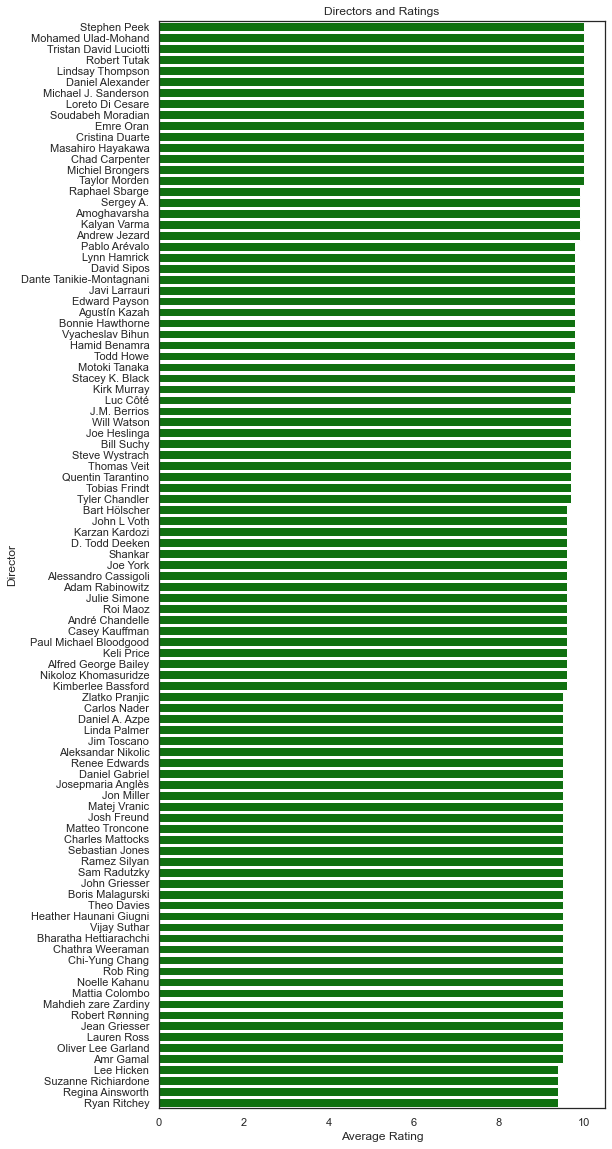

In [20]:
f, ax = plt.subplots(figsize=(8, 20))
sns.set_theme(style="white")

sns.set_color_codes("pastel")
sns.barplot(x="averagerating", y="primary_name", data=directors,
            label="Total", color="green")
ax.set_title('Directors and Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Director');

# BREAKING APART "KNOWN FOR COLUMN"

In [66]:
# imdb_directors_only.directors = imdb_directors_only.directors.str.split(',')
# imdb_directors_only.dropna(subset=['directors'], inplace=True)
# imdb_directors_only=imdb_directors_only.explode('directors')
# imdb_directors_only
